In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as patches

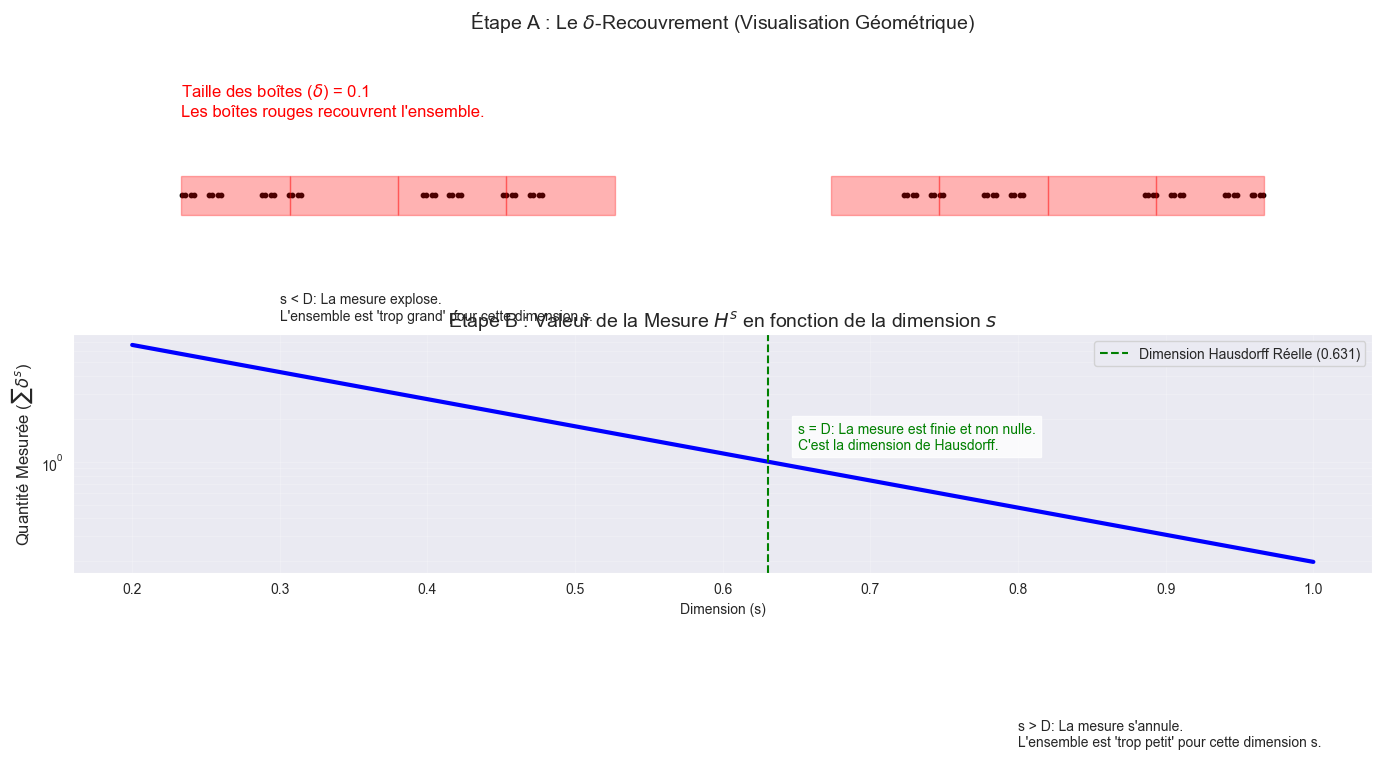

In [3]:
# --- 1. Génération de la Fractale (Ensemble de Cantor) ---
def generer_cantor_points(n_iterations):
    """Génère une approximation de l'ensemble de Cantor (points finaux)."""
    segments = [[0, 1]]
    for _ in range(n_iterations):
        nouveaux_segments = []
        for seg in segments:
            longueur = (seg[1] - seg[0]) / 3
            # Garder le tiers gauche et le tiers droit
            nouveaux_segments.append([seg[0], seg[0] + longueur])
            nouveaux_segments.append([seg[1] - longueur, seg[1]])
        segments = nouveaux_segments

    # On retourne le milieu de chaque petit segment restant pour représenter les points
    return np.array([0.5 * (s[0] + s[1]) for s in segments])

# --- 2. Calcul du Recouvrement (Approximation Boîte) ---
def calculer_mesure_hausdorff(points, delta, s):
    """
    Simule l'étape de recouvrement et de sommation.
    1. On crée une grille de taille delta.
    2. On compte combien de cases sont occupées (N).
    3. Somme = N * (delta)^s
    """
    # On "discrétise" les points selon la grille delta
    cases_occupees = np.unique((points // delta).astype(int))
    N = len(cases_occupees) # Nombre de boîtes nécessaires

    # La formule de la somme : Somme(diam^s)
    # Ici tous les diamètres sont égaux à delta
    mesure = N * (delta ** s)
    return mesure, N, cases_occupees

# --- Préparation des données ---
# On génère un Cantor assez fin (étape 6)
points_cantor = generer_cantor_points(6)

# On va tester différentes dimensions 's' autour de la vraie dimension (0.63)
s_values = np.linspace(0.2, 1.0, 50)
delta_fixe = 1/3**4  # Une taille de boîte petite fixe pour le graphe 2

resultats = []
for s in s_values:
    mesure, _, _ = calculer_mesure_hausdorff(points_cantor, delta_fixe, s)
    resultats.append({"Dimension (s)": s, "Mesure (H^s)": mesure})

df_mesure = pd.DataFrame(resultats)

# --- VISUALISATION ---
fig = plt.figure(figsize=(14, 8))
gs = fig.add_gridspec(2, 2)

# GRAPHIQUE 1 : Visualisation du Recouvrement (Étape A)
ax1 = fig.add_subplot(gs[0, :])
ax1.set_title("Étape A : Le $\delta$-Recouvrement (Visualisation Géométrique)", fontsize=14)
ax1.set_xlim(-0.1, 1.1)
ax1.set_ylim(-0.2, 0.4)
ax1.axis('off')

# Dessiner les points du Cantor
ax1.scatter(points_cantor, np.zeros_like(points_cantor), color='black', s=10, label='Ensemble de Cantor')

# Dessiner les boîtes de recouvrement pour un delta spécifique
delta_demo = 0.1
_, _, cases = calculer_mesure_hausdorff(points_cantor, delta_demo, 0)
for case_idx in cases:
    # Création d'un rectangle (boîte)
    rect = patches.Rectangle((case_idx * delta_demo, -0.05), delta_demo, 0.1,
                             linewidth=1, edgecolor='red', facecolor='red', alpha=0.3)
    ax1.add_patch(rect)

ax1.text(0, 0.2, f"Taille des boîtes ($\delta$) = {delta_demo}\nLes boîtes rouges recouvrent l'ensemble.", color='red', fontsize=12)

# GRAPHIQUE 2 : Le comportement Critique (Étape B & C)
ax2 = fig.add_subplot(gs[1, :])
sns.lineplot(data=df_mesure, x="Dimension (s)", y="Mesure (H^s)", ax=ax2, linewidth=3, color='blue')

# Ligne verticale pour la vraie dimension théorique
dim_theorique = np.log(2) / np.log(3) # ~0.6309
ax2.axvline(dim_theorique, color='green', linestyle='--', label=f'Dimension Hausdorff Réelle ({dim_theorique:.3f})')

ax2.set_title("Étape B : Valeur de la Mesure $H^s$ en fonction de la dimension $s$", fontsize=14)
ax2.set_ylabel("Quantité Mesurée ($\sum \delta^s$)", fontsize=12)
ax2.set_yscale('log') # Échelle log car les valeurs explosent ou s'annulent très vite
ax2.legend()
ax2.grid(True, which="both", ls="-", alpha=0.2)

# Annotations pour comprendre (améliorées)
ax2.text(0.3, 10, "s < D: La mesure explose.\nL'ensemble est 'trop grand' pour cette dimension s.",
         fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
ax2.text(0.8, 0.01, "s > D: La mesure s'annule.\nL'ensemble est 'trop petit' pour cette dimension s.",
         fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
ax2.text(dim_theorique + 0.02, 1.5, "s = D: La mesure est finie et non nulle.\nC'est la dimension de Hausdorff.",
         fontsize=10, color='green', bbox=dict(facecolor='white', alpha=0.8),
         horizontalalignment='left', verticalalignment='center')

plt.tight_layout()
plt.show()


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


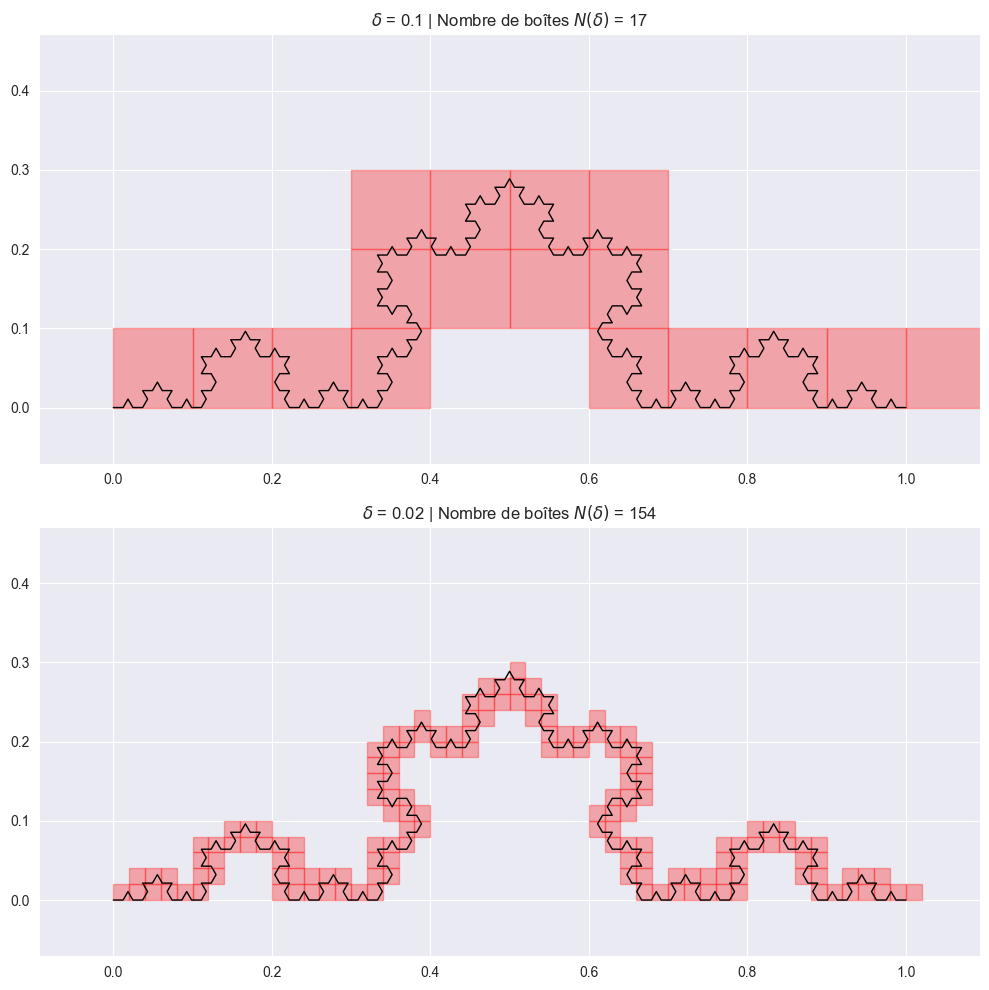

In [7]:
# --- 1. Génération de la Courbe de Von Koch (La Fractale) ---
def koch_curve(p1, p2, iterations):
    if iterations == 0:
        return [p1, p2]

    # Division du segment en 3 parties et création du pic
    p1 = np.array(p1)
    p2 = np.array(p2)
    v = p2 - p1
    dist = np.linalg.norm(v)

    s = p1 + v / 3
    t = p1 + 2 * v / 3

    # Rotation de 60 degrés pour le point du sommet
    angle = np.pi / 3
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                [np.sin(angle), np.cos(angle)]])
    u = s + rotation_matrix @ (t - s)

    # Récursion
    points = []
    points.extend(koch_curve(p1, s, iterations - 1)[:-1]) # On évite les doublons
    points.extend(koch_curve(s, u, iterations - 1)[:-1])
    points.extend(koch_curve(u, t, iterations - 1)[:-1])
    points.extend(koch_curve(t, p2, iterations - 1))

    return points

# Générer les points de la courbe
points_koch = np.array(koch_curve([0, 0], [1, 0], 4)) # 4 itérations
x, y = points_koch[:, 0], points_koch[:, 1]

# --- 2. Fonction de Recouvrement (Delta-Cover) ---
def plot_delta_cover(ax, delta, x_coords, y_coords):
    """
    Dessine la fractale et son recouvrement par des boîtes de taille delta.
    """
    # Dessin de la fractale (en noir fin)
    ax.plot(x_coords, y_coords, color='black', linewidth=1, label='Ensemble F (Von Koch)')

    # Algorithme de recouvrement (Grid method)
    # On identifie quels carrés de la grille contiennent des morceaux de la fractale

    # On trouve les bornes min/max
    x_min, x_max = np.min(x_coords), np.max(x_coords)
    y_min, y_max = np.min(y_coords), np.max(y_coords)

    # Création des bords de la grille
    x_grid = np.arange(np.floor(x_min/delta)*delta, np.ceil(x_max/delta)*delta + delta, delta)
    y_grid = np.arange(np.floor(y_min/delta)*delta, np.ceil(y_max/delta)*delta + delta, delta)

    # Compteur de boîtes (N_delta)
    count = 0

    # Pour chaque point de la fractale, on trouve sa boîte
    # (Méthode simplifiée : on checke les points générés)
    boites_actives = set()
    for px, py in zip(x_coords, y_coords):
        col = int(np.floor(px / delta))
        row = int(np.floor(py / delta))
        boites_actives.add((col, row))

    # Dessin des boîtes actives
    for (col, row) in boites_actives:
        # Coin bas-gauche de la boîte
        corner_x = col * delta
        corner_y = row * delta

        # Ajout du rectangle rouge (Le recouvrement U_i)
        rect = patches.Rectangle((corner_x, corner_y), delta, delta,
                                 linewidth=1, edgecolor='red', facecolor='red', alpha=0.3)
        ax.add_patch(rect)
        count += 1

    ax.set_title(f"$\delta$ = {delta} | Nombre de boîtes $N(\delta)$ = {len(boites_actives)}")
    ax.axis('equal')
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(0, 0.4)

# --- 3. Affichage Comparatif ---
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Premier recouvrement : Delta grossier
plot_delta_cover(axes[0], delta=0.1, x_coords=x, y_coords=y)

# Deuxième recouvrement : Delta fin
plot_delta_cover(axes[1], delta=0.02, x_coords=x, y_coords=y)

plt.tight_layout()
t.show()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


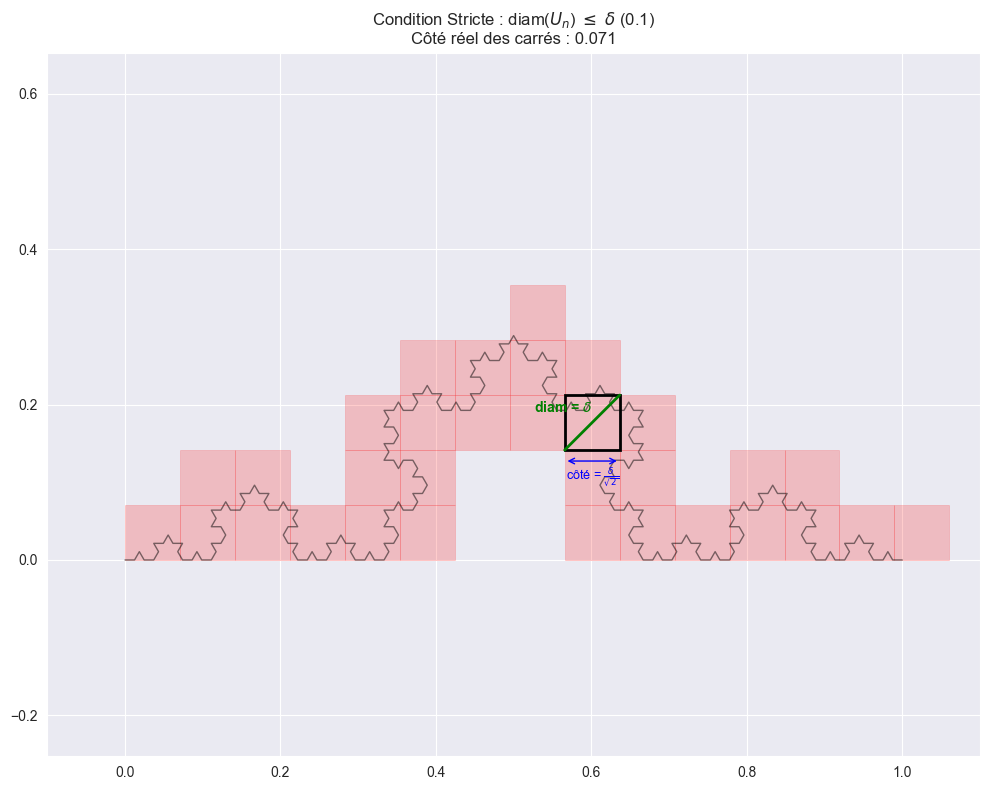

In [12]:
    import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# --- 1. Génération de la Courbe de Von Koch (Inchangé) ---
def koch_curve(p1, p2, iterations):
    if iterations == 0:
        return [p1, p2]

    p1 = np.array(p1)
    p2 = np.array(p2)
    v = p2 - p1
    s = p1 + v / 3
    t = p1 + 2 * v / 3
    angle = np.pi / 3
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                [np.sin(angle), np.cos(angle)]])
    u = s + rotation_matrix @ (t - s)
    points = []
    points.extend(koch_curve(p1, s, iterations - 1)[:-1])
    points.extend(koch_curve(s, u, iterations - 1)[:-1])
    points.extend(koch_curve(u, t, iterations - 1)[:-1])
    points.extend(koch_curve(t, p2, iterations - 1))
    return points

points_koch = np.array(koch_curve([0, 0], [1, 0], 4))
x, y = points_koch[:, 0], points_koch[:, 1]

# --- 2. Fonction de Recouvrement RIGOUREUSE ---
def plot_rigorous_cover(ax, delta_math, x_coords, y_coords):
    """
    Trace un recouvrement où le DIAMÈTRE (diagonale) est exactement égal à delta_math.
    """
    # === CORRECTION MATHÉMATIQUE ===
    # Pour un carré : Diagonale = Côté * sqrt(2)
    # On veut : Diagonale <= delta_math
    # Donc : Côté <= delta_math / sqrt(2)
    cote_carre = delta_math / np.sqrt(2)

    # Dessin de la fractale
    ax.plot(x_coords, y_coords, color='black', linewidth=1, alpha=0.5, label='Von Koch')

    # Identification des boîtes actives (en utilisant le côté calculé)
    boites_actives = set()
    for px, py in zip(x_coords, y_coords):
        col = int(np.floor(px / cote_carre))
        row = int(np.floor(py / cote_carre))
        boites_actives.add((col, row))

    # Dessin des boîtes
    for (col, row) in boites_actives:
        corner_x = col * cote_carre
        corner_y = row * cote_carre
        rect = patches.Rectangle((corner_x, corner_y), cote_carre, cote_carre,
                                 linewidth=0.5, edgecolor='red', facecolor='red', alpha=0.2)
        ax.add_patch(rect)

    # === ANNOTATION EXPLICATIVE ===
    # On prend une boîte au hasard pour l'exemple
    exemple_box = list(boites_actives)[len(boites_actives)//2]
    ex_col, ex_row = exemple_box
    x0 = ex_col * cote_carre
    y0 = ex_row * cote_carre

    # 1. Tracer le DIAMÈTRE (La diagonale verte)
    # C'est cette ligne qui vaut maintenant "delta"
    ax.plot([x0, x0 + cote_carre], [y0, y0 + cote_carre], color='green', linestyle='-', linewidth=2)
    ax.text(x0 + cote_carre/2, y0 + cote_carre/2 + 0.01, r'diam = $\delta$', color='green',
            ha='right', va='bottom', fontweight='bold')

    # 2. Tracer le CÔTÉ (Bleu)
    # Le côté est maintenant plus petit que delta
    ax.annotate(text='', xy=(x0, y0 - cote_carre*0.2), xytext=(x0 + cote_carre, y0 - cote_carre*0.2),
                arrowprops=dict(arrowstyle='<->', color='blue', lw=1))
    ax.text(x0 + cote_carre/2, y0 - cote_carre*0.5, r'côté = $\frac{\delta}{\sqrt{2}}$', color='blue',
            ha='center', va='center', fontsize=9)

    # Zoom sur la boîte témoin
    focus_rect = patches.Rectangle((x0, y0), cote_carre, cote_carre,
                                   linewidth=2, edgecolor='black', facecolor='none')
    ax.add_patch(focus_rect)

    ax.set_title(fr"Condition Stricte : diam($U_n$) $\leq$ $\delta$ ({delta_math})" + "\n" + f"Côté réel des carrés : {cote_carre:.3f}")
    ax.axis('equal')
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 0.5)

# --- 3. Affichage ---
fig, ax = plt.subplots(figsize=(10, 8))

# On demande un recouvrement de diamètre (delta) 0.1
# Le code va automatiquement utiliser des carrés de côté ~0.0707
plot_rigorous_cover(ax, delta_math=0.1, x_coords=x, y_coords=y)

plt.tight_layout()
plt.show()

--- Expérience ---
Dimension choisie s : 0.6309
Taille de la règle delta : 0.1
Nombre de boîtes nécessaires : 8
Valeur de la delta-mesure (N * delta^s) : 1.8714


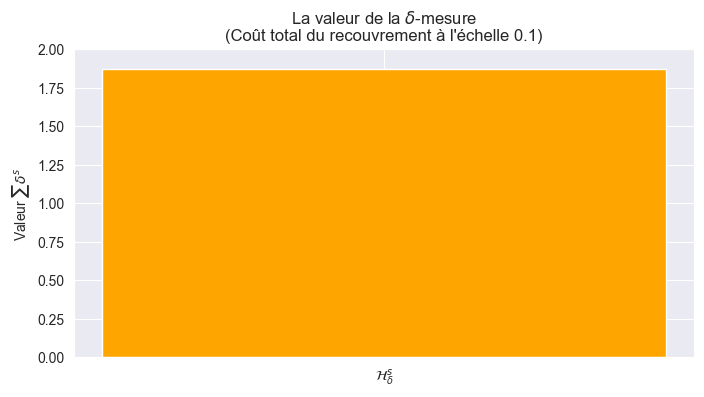

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Générer le Cantor ---
def cantor_points(n):
    # Génère une approximation fine (points)
    pts = [0, 1]
    for _ in range(n):
        new_pts = []
        for p in pts:
            new_pts.extend([p/3, p/3 + 2/3]) # Transformation IFS simple
        pts = new_pts
    return np.array(pts)

# On prend un Cantor assez dense (points finaux)
# Note: pour simplifier, on simule juste les bornes des segments finaux
points = np.linspace(0, 1, 10000)
# Filtrage "maison" pour ne garder que ce qui est proche d'un Cantor
mask = np.ones_like(points, dtype=bool)
temp_points = points
for _ in range(5): # 5 itérations de "trous"
    # On garde si la décimale en base 3 n'est pas 1...
    # Simplification : On utilise juste la méthode récursive géométrique
    pass
# (Pour faire simple, réutilisons la méthode des segments exacte)
def get_cantor_segments(n):
    segs = [(0,1)]
    for _ in range(n):
        next_segs = []
        for s, e in segs:
            l = (e-s)/3
            next_segs.append((s, s+l))
            next_segs.append((e-l, e))
        segs = next_segs
    return segs

segments = get_cantor_segments(8) # Cantor fin
# On prend le milieu de chaque segment pour représenter le fractal
pts_cantor = np.array([(s+e)/2 for s,e in segments])

# --- 2. Calculer la delta-mesure ---
def calcul_delta_mesure(points, delta, s):
    # 1. On recouvre avec des boîtes de taille delta
    # (Approximation du "inf" par une grille régulière)
    bins = np.arange(0, 1 + delta, delta)
    hist, _ = np.histogram(points, bins=bins)

    # Nombre de boîtes non vides (N)
    N = np.sum(hist > 0)

    # 2. Calcul de la formule : Somme (diam)^s
    # Ici tous les diamètres sont = delta (approximation)
    valeur_mesure = N * (delta ** s)

    return N, valeur_mesure

# --- 3. Expérience ---
delta = 0.1 # On teste avec une règle de 10cm
s_dim = np.log(2)/np.log(3) # La vraie dimension (~0.63)

N, h_delta = calcul_delta_mesure(pts_cantor, delta, s_dim)

print(f"--- Expérience ---")
print(f"Dimension choisie s : {s_dim:.4f}")
print(f"Taille de la règle delta : {delta}")
print(f"Nombre de boîtes nécessaires : {N}")
print(f"Valeur de la delta-mesure (N * delta^s) : {h_delta:.4f}")

# Visualisation graphique de l'équation
plt.figure(figsize=(8, 4))
plt.bar(['$\mathcal{H}_\delta^s$'], [h_delta], color='orange', width=0.5)
plt.title(f"La valeur de la $\delta$-mesure\n(Coût total du recouvrement à l'échelle {delta})")
plt.ylabel(f"Valeur $\sum \delta^s$")
plt.ylim(0, 2) # On sait que pour Cantor ça doit tourner autour de 1
plt.show()